# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
# url = # YOUR CODE HERE
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    
    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | whitehorse
Processing Record 2 of Set 1 | west island
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | impfondo
Processing Record 5 of Set 1 | odesskoye
Processing Record 6 of Set 1 | stanley
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | lakhna
Processing Record 9 of Set 1 | labrador city
Processing Record 10 of Set 1 | berezovyy
Processing Record 11 of Set 1 | vadso
Processing Record 12 of Set 1 | edinburgh of the seven seas
Processing Record 13 of Set 1 | bokoro
Processing Record 14 of Set 1 | masterton
Processing Record 15 of Set 1 | puerto natales
Processing Record 16 of Set 1 | ca mau
Processing Record 17 of Set 1 | puerto san jose
Processing Record 18 of Set 1 | poronaysk
Processing Record 19 of Set 1 | bilibino
Processing Record 20 of Set 1 | kununurra
Processing Record 21 of Set 1 | sao gabriel da cachoeira
Processing Record 22 of Se

Processing Record 41 of Set 4 | contamana
Processing Record 42 of Set 4 | alotau
City not found. Skipping...
Processing Record 43 of Set 4 | skutskar
City not found. Skipping...
Processing Record 44 of Set 4 | meadow lakes
Processing Record 45 of Set 4 | kirando
Processing Record 46 of Set 4 | noumea
Processing Record 47 of Set 4 | conceicao da barra
Processing Record 48 of Set 4 | ailuk
Processing Record 49 of Set 4 | menongue
Processing Record 0 of Set 5 | iskateley
Processing Record 1 of Set 5 | isafjordur
Processing Record 2 of Set 5 | ust-tsilma
Processing Record 3 of Set 5 | chadron
Processing Record 4 of Set 5 | dzuunharaa
Processing Record 5 of Set 5 | puerto san carlos
City not found. Skipping...
Processing Record 6 of Set 5 | uturoa
Processing Record 7 of Set 5 | nar'yan-mar
Processing Record 8 of Set 5 | butterworth
Processing Record 9 of Set 5 | am djarass
City not found. Skipping...
Processing Record 10 of Set 5 | labytnangi
Processing Record 11 of Set 5 | katsuura
Process

Processing Record 29 of Set 8 | madinat ash shamal
Processing Record 30 of Set 8 | hami
Processing Record 31 of Set 8 | sao geraldo do araguaia
Processing Record 32 of Set 8 | merizo village
Processing Record 33 of Set 8 | siwa oasis
Processing Record 34 of Set 8 | babayevo
Processing Record 35 of Set 8 | fayetteville
Processing Record 36 of Set 8 | baukau
Processing Record 37 of Set 8 | zhob
Processing Record 38 of Set 8 | sungai raya
Processing Record 39 of Set 8 | penzance
Processing Record 40 of Set 8 | ulladulla
Processing Record 41 of Set 8 | al qadarif
Processing Record 42 of Set 8 | knyaze-volkonskoye
Processing Record 43 of Set 8 | iwaki
Processing Record 44 of Set 8 | pithoro
Processing Record 45 of Set 8 | east london
Processing Record 46 of Set 8 | vila do maio
Processing Record 47 of Set 8 | undurkhaan
Processing Record 48 of Set 8 | malinyi
Processing Record 49 of Set 8 | turpan
Processing Record 0 of Set 9 | santana
Processing Record 1 of Set 9 | espargos
City not found.

Processing Record 20 of Set 12 | yeppoon
Processing Record 21 of Set 12 | laikit, laikit ii (dimembe)
Processing Record 22 of Set 12 | prieska
Processing Record 23 of Set 12 | as sulaymaniyah
Processing Record 24 of Set 12 | omuthiya
City not found. Skipping...
Processing Record 25 of Set 12 | skovorodino
Processing Record 26 of Set 12 | chelghoum el aid
Processing Record 27 of Set 12 | new norfolk
Processing Record 28 of Set 12 | wakkanai
Processing Record 29 of Set 12 | chipiona
Processing Record 30 of Set 12 | san patricio
Processing Record 31 of Set 12 | port blair
Processing Record 32 of Set 12 | karasu
Processing Record 33 of Set 12 | mar del plata
Processing Record 34 of Set 12 | sinjai
Processing Record 35 of Set 12 | muravlenko
Processing Record 36 of Set 12 | petauke
Processing Record 37 of Set 12 | greenland
Processing Record 38 of Set 12 | lorengau
Processing Record 39 of Set 12 | le lavandou
Processing Record 40 of Set 12 | saint-pierre
Processing Record 41 of Set 12 | koh

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,whitehorse,60.7161,-135.0538,24.45,49,75,2.24,CA,1690417368
1,west island,-12.1568,96.8225,23.99,83,75,10.80,CC,1690417536
2,waitangi,-43.9535,-176.5597,9.34,86,92,1.34,NZ,1690417531
3,impfondo,1.6381,18.0667,22.21,84,82,0.82,CG,1690417883
4,odesskoye,54.2111,72.9651,18.68,82,98,2.30,RU,1690417883


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,whitehorse,60.7161,-135.0538,24.45,49,75,2.24,CA,1690417368
1,west island,-12.1568,96.8225,23.99,83,75,10.80,CC,1690417536
2,waitangi,-43.9535,-176.5597,9.34,86,92,1.34,NZ,1690417531
3,impfondo,1.6381,18.0667,22.21,84,82,0.82,CG,1690417883
4,odesskoye,54.2111,72.9651,18.68,82,98,2.30,RU,1690417883


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

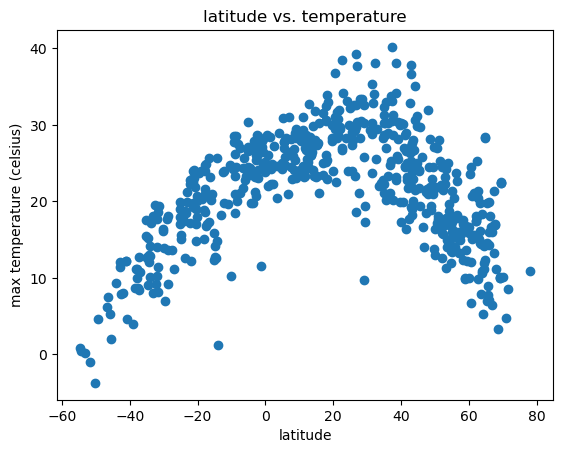

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.title("latitude vs. temperature")
plt.xlabel('latitude')
plt.ylabel('max temperature (celsius)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

In [ ]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])

# Incorporate the other graph properties
plt.title("latitude vs. Humidity")
plt.xlabel('latitude')
plt.ylabel('Humidity')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

In [ ]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.title("latitude vs. Cloudiness")
plt.xlabel('latitude')
plt.ylabel('Cloudiness')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

In [ ]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.title("latitude vs. Wind Speed")
plt.xlabel('latitude')
plt.ylabel('Wind Speed')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x, y, title, x_label, y_label, annotate_pos):
    slope, intercept, rvalue, pvalue, stderr = linregress(x,y)
    regression = x * slope +intercept
    
    #Equation of line
    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
    
    plt.plot(x, regression, "r")
    plt.scatter(x,y)
    #Annotate text for line
    plt.annotate(line_eq, annotate_pos, fontsize = 12, color = "r")
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    return rvalue, pvalue, stderr

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']
title = 'Temperature vs. Latitude Linear Regression - Northern Hemisphere'
x_label = 'Latitude'
y_label = 'Max Temperature'
annotate_pos = (x.mean()-20,y.mean()-10)
rvalue, pvalue, stderr = plot_linear_regression(x, y, title, x_label, y_label, annotate_pos)
print('R^2=', rvalue)
print('p-value=', pvalue)
print('Standard error=', stderr)

In [ ]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']
title = 'Temperature vs. Latitude Linear Regression - Southern Hemisphere'
x_label = 'Latitude'
y_label = 'Max Temperature'
annotate_pos = (x.mean()-25,y.mean()+1)
rvalue, pvalue, stderr = plot_linear_regression(x, y, title, x_label, y_label, annotate_pos)
print('R^2=', rvalue)
print('p-value=', pvalue)
print('Standard error=', stderr)

**Discussion about the linear relationship:** 
R-squared value for both northern and southern hemisphere is significant and p-value for both cases is almost zero and standard error is realatively small. All these imply that there is evidence that there is a linear relationship between Maximum temperature and Latitude for both northern and southern hemispheres.

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']
title = 'Humidity vs. Latitude Linear Regression - Northern Hemisphere'
x_label = 'Latitude'
y_label = 'Humidity'
annotate_pos = (x.mean()-20,y.mean()-20)
rvalue, pvalue, stderr = plot_linear_regression(x, y, title, x_label, y_label, annotate_pos)
print('R^2=', rvalue)
print('p-value=', pvalue)
print('Standard error=', stderr)

In [ ]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']
title = 'Humidity vs. Latitude Linear Regression - Southern Hemisphere'
x_label = 'Latitude'
y_label = 'Humidity'
annotate_pos = (x.mean()-20,y.mean()-10)
rvalue, pvalue, stderr = plot_linear_regression(x, y, title, x_label, y_label, annotate_pos)
print('R^2=', rvalue)
print('p-value=', pvalue)
print('Standard error=', stderr)

**Discussion about the linear relationship:** 
For both northeren and southern hemispheres the value of R-squared is close to zero, p-value is greater than .05, and standard error is relatively large. This implyes that there is not eveidence that there is a linear relationship between latitude and humidity in both northern and southern hemispheres. 

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']
title = 'Cloudiness vs. Latitude Linear Regression - Northern Hemisphere'
x_label = 'Latitude'
y_label = 'Cloudiness'
annotate_pos = (x.mean()-20,y.mean()-10)
rvalue, pvalue, stderr = plot_linear_regression(x, y, title, x_label, y_label, annotate_pos)
print('R^2=', rvalue)
print('p-value=', pvalue)
print('Standard error=', stderr)

In [ ]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']
title = 'Cloudiness vs. Latitude Linear Regression - Southern Hemisphere'
x_label = 'Latitude'
y_label = 'Cloudiness'
annotate_pos = (x.mean()-20,y.mean()+10)
rvalue, pvalue, stderr = plot_linear_regression(x, y, title, x_label, y_label, annotate_pos)
print('R^2=', rvalue)
print('p-value=', pvalue)
print('Standard error=', stderr)

**Discussion about the linear relationship:** 
For both northeren and southern hemispheres the value of R-squared is samll, p-value is close to .05, and standard error is relatively large. This implyes that there is NOT eveidence that there is a linear relationship between latitude and humidity in both northern and southern hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']
title = 'Wind Speed vs. Latitude Linear Regression - Northern Hemisphere'
x_label = 'Latitude'
y_label = 'Wind Speed'
annotate_pos = (x.mean()-20,y.mean()+2)
rvalue, pvalue, stderr = plot_linear_regression(x, y, title, x_label, y_label, annotate_pos)
print('R^2=', rvalue)
print('p-value=', pvalue)
print('Standard error=', stderr)

In [ ]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']
title = 'Wind Speed vs. Latitude Linear Regression - Southern Hemisphere'
x_label = 'Latitude'
y_label = 'Wind Speed'
annotate_pos = (x.mean()-20,y.mean()+2)
rvalue, pvalue, stderr = plot_linear_regression(x, y, title, x_label, y_label, annotate_pos)
print('R^2=', rvalue)
print('p-value=', pvalue)
print('Standard error=', stderr)

**Discussion about the linear relationship:** Y
For both northeren and southern hemispheres the value of R-squared is relatively samll, p-value is greater than .05, and standard error is relatively large. This implyes that there is NOT eveidence that there is a linear relationship between latitude and humidity in both northern and southern hemispheres.